<a href="https://colab.research.google.com/github/Tirta2241720045/PCVK_Ganjil_2024/blob/main/Kuis%202%20PCVK/Percobaan_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading training data...
Loading 80 images for class Ayam from /content/drive/MyDrive/dataset/Minggu12/Dataset_Daging_Hewan_Ternak/Training
Loading 80 images for class Kambing from /content/drive/MyDrive/dataset/Minggu12/Dataset_Daging_Hewan_Ternak/Training
Loading 80 images for class Sapi from /content/drive/MyDrive/dataset/Minggu12/Dataset_Daging_Hewan_Ternak/Training
Loading testing data...
Loading 20 images for class Ayam from /content/drive/MyDrive/dataset/Minggu12/Dataset_Daging_Hewan_Ternak/Testing
Loading 20 images for class Kambing from /content/drive/MyDrive/dataset/Minggu12/Dataset_Daging_Hewan_Ternak/Testing
Loading 20 images for class Sapi from /content/drive/MyDrive/dataset/Minggu12/Dataset_Daging_Hewan_Ternak/Testing
Training samples: 240
Testing samples: 60


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 111, 111, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 55, 55, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 55, 55, 96)          │          55,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 27, 27, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 27, 27, 96)          │          83,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 13, 13, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 16224)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       2,076,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,235,011 (8.53 MB)

 Trainable params: 2,235,011 (8.53 MB)

 Non-trainable params: 0 (0.00 B)


Training model...
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 40s 7s/step - accuracy: 0.3280 - loss: 1.1848 - val_accuracy: 0.3333 - val_loss: 1.0963
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 36s 7s/step - accuracy: 0.3428 - loss: 1.0918 - val_accuracy: 0.3333 - val_loss: 1.0241
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 34s 7s/step - accuracy: 0.3744 - loss: 1.0218 - val_accuracy: 0.4333 - val_loss: 0.8735
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 36s 7s/step - accuracy: 0.6484 - loss: 0.8624 - val_accuracy: 0.8167 - val_loss: 0.6395
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 40s 7s/step - accuracy: 0.6990 - loss: 0.8110 - val_accuracy: 0.8667 - val_loss: 0.4491
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 34s 7s/step - accuracy: 0.7766 - loss: 0.6835 - val_accuracy: 0.8667 - val_loss: 0.3492
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 52s 8s/step - accuracy: 0.7541 - loss: 0.5785 - val_accuracy: 0.8667 - val_loss: 0.3621
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 36s 7s/step - accuracy: 0.8261 - loss: 0.5097 - val_accuracy: 0.8833 - val_loss: 0.3928
Epoch 9/20
5/5 ━━━━

Saving Kambing (9).jpg to Kambing (9).jpg
Saving Sapi (9).JPG to Sapi (9).JPG
Saving object6.jpg to object6.jpg
Processing file 1: Kambing (9).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
Processing file 2: Sapi (9).JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Processing file 3: object6.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Prediction plot saved at /content/drive/MyDrive/dataset/Minggu12/Dataset_Daging_Hewan_Ternak/prediction_percobaan_A.png


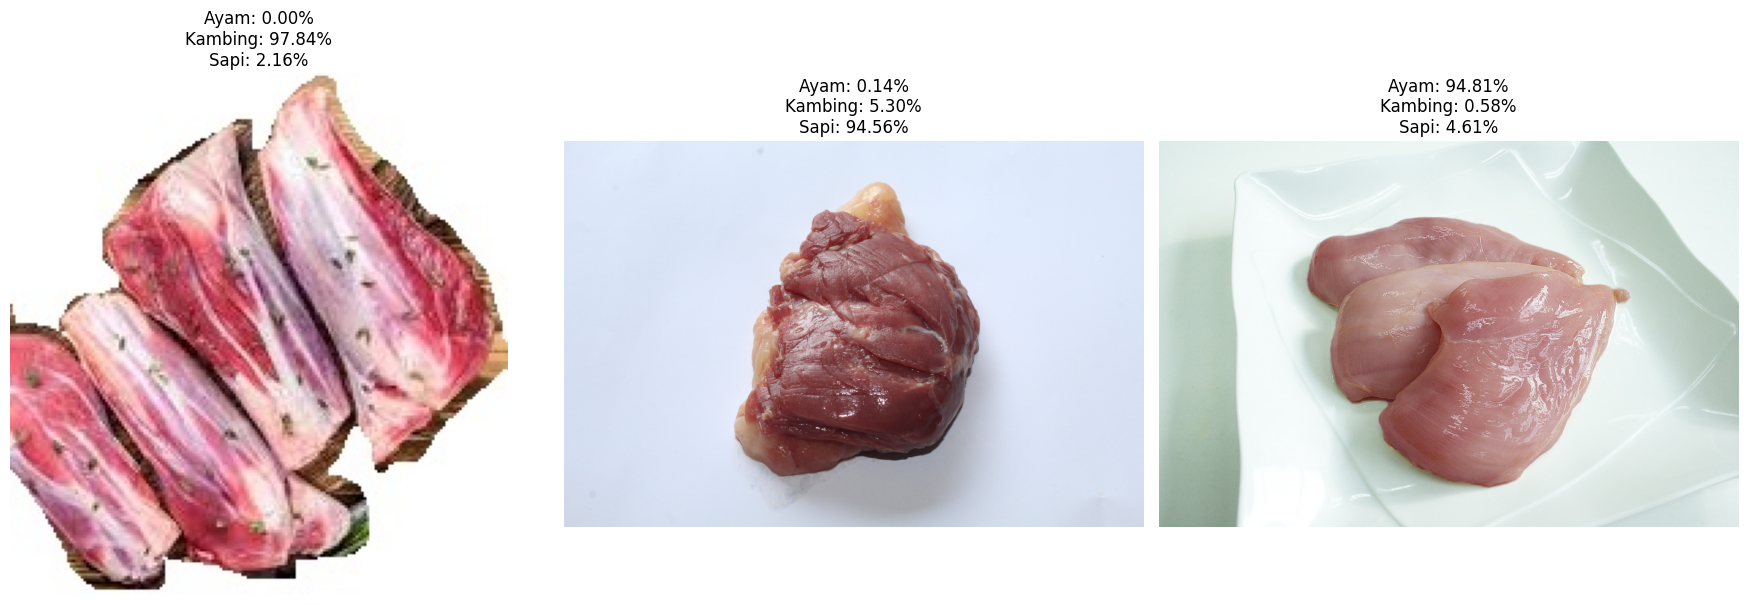

In [5]:
import os
import numpy as np
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from google.colab import files

TRAIN_DIR = '/content/drive/MyDrive/dataset/Minggu12/Dataset_Daging_Hewan_Ternak/Training'
TEST_DIR = '/content/drive/MyDrive/dataset/Minggu12/Dataset_Daging_Hewan_Ternak/Testing'
SAVE_DIR = '/content/drive/MyDrive/dataset/Minggu12/Dataset_Daging_Hewan_Ternak/'


def load_dataset(directory, target_size=(224, 224)):
    X = []
    Z = []
    classes = ['Ayam', 'Kambing', 'Sapi']

    for label in classes:
        folder_path = os.path.join(directory, label)
        if not os.path.exists(folder_path):
            raise FileNotFoundError(f"Directory not found: {folder_path}")

        files = os.listdir(folder_path)
        print(f"Loading {len(files)} images for class {label} from {directory}")

        for img_name in files:
            img_path = os.path.join(folder_path, img_name)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, target_size)
                X.append(img)
                Z.append(label)
            else:
                print(f"Warning: Could not load image {img_path}")

    return np.array(X), np.array(Z)


def create_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu', padding = 'Same'),
        MaxPooling2D((2, 2)),
        Conv2D(96, (3, 3), activation='relu', padding = 'Same'),
        MaxPooling2D((2, 2)),
        Conv2D(96, (3, 3), activation='relu', padding = 'Same'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model


def plot_training_history(history, save_path):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.savefig(save_path)
    print(f"Training history plot saved at {save_path}")
    plt.close()


def predict_uploaded_images(model, target_size=(224, 224), save_dir=SAVE_DIR):
    print("Please upload 3 images for prediction.")
    uploaded = files.upload()

    if len(uploaded) != 3:
        print("Please upload exactly 3 images!")
        return

    predictions_results = []
    images = []

    for i, filename in enumerate(uploaded.keys(), start=1):
        print(f"Processing file {i}: {filename}")
        img_path = filename

        img = cv2.imread(img_path)
        if img is None:
            print(f"Error: Could not read {img_path}")
            continue

        original_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        images.append(original_img)

        img = cv2.resize(img, target_size)
        img = img.astype('float32') / 255.0
        img = np.expand_dims(img, axis=0)

        predictions = model.predict(img)[0]
        predictions_results.append(predictions)

    plt.figure(figsize=(18, 6))
    classes = ['Ayam', 'Kambing', 'Sapi']

    for i in range(3):
        plt.subplot(1, 3, i + 1)
        plt.imshow(images[i])
        plt.axis('off')

        prediction_text = "\n".join(
            [f"{cls}: {predictions_results[i][idx] * 100:.2f}%" for idx, cls in enumerate(classes)]
        )
        plt.title(prediction_text)

    plt.tight_layout()

    prediction_save_path = os.path.join(save_dir, "prediction_percobaan_A.png")
    plt.savefig(prediction_save_path)
    print(f"Prediction plot saved at {prediction_save_path}")
    plt.show()


def main():
    print("Loading training data...")
    X_train, Z_train = load_dataset(TRAIN_DIR)
    print("Loading testing data...")
    X_test, Z_test = load_dataset(TEST_DIR)

    le = LabelEncoder()
    y_train = le.fit_transform(Z_train)
    y_test = le.transform(Z_test)

    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    X_train = X_train.astype('float32') / 255.0
    X_test = X_test.astype('float32') / 255.0

    print(f"Training samples: {len(X_train)}")
    print(f"Testing samples: {len(X_test)}")

    datagen = ImageDataGenerator(
        rotation_range=10,
        zoom_range=0.1,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    datagen.fit(X_train)

    model = create_model((224, 224, 3), 3)
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    model.summary()

    batch_size = 50

    train_generator = datagen.flow(
        X_train, y_train,
        batch_size=batch_size,
        shuffle=True
    )

    print("\nTraining model...")
    history = model.fit(
        train_generator,
        epochs=20,
        validation_data=(X_test, y_test),
        verbose=1
    )

    save_path = os.path.join(SAVE_DIR, "history_percobaan_A.png")
    plot_training_history(history, save_path)

    print("\nFinal evaluation on test set:")
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f'Test accuracy: {test_accuracy:.4f}')
    print(f'Test loss: {test_loss:.4f}')

    predict_uploaded_images(model)


if __name__ == "__main__":
    main()
